In [1]:
from shapely.geometry import Polygon
import numpy as np
%matplotlib inline

In [2]:
import geopandas as gpd
from tobler import area_weighted

In [3]:
from tobler.area_weighted import area_tables, area_interpolate

## Example: Two GeoDataFrames

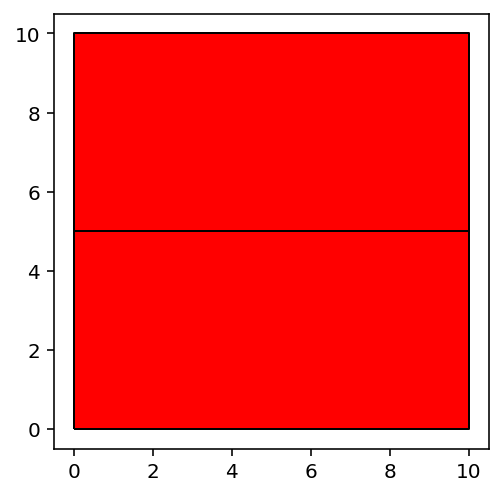

In [4]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (10,0), (10,5), (0,5)]),
                      Polygon([(0,5), (0,10),  (10,10), (10,5)])])

polys2 = gpd.GeoSeries([Polygon([(0,0), (5,0), (5,7), (0,7)]),
                      Polygon([(5,0), (5,10),  (10,10), (10,0)]),
                       Polygon([(0,7), (0,10), (5,10), (5,7)  ])
                       ])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df1['population'] = [ 500,  200]
df1['pci'] = [75, 100]
df1['income'] = df1['population'] * df1['pci']

df2['population'] = [ 500,  100, 200]
df2['pci'] = [75, 80, 100]
df2['income'] = df2['population'] * df2['pci']

ax = df1.plot(color='red', edgecolor='k')

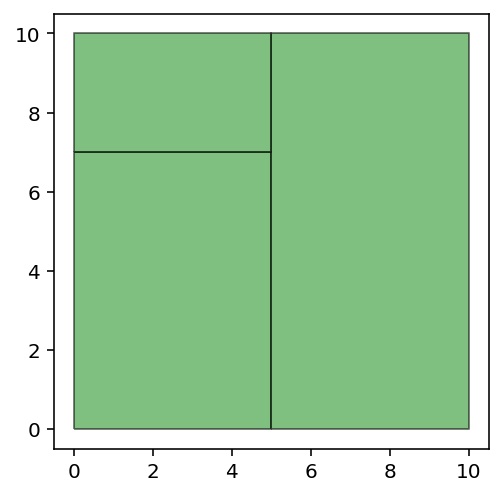

In [5]:
ax = df2.plot(color='green', alpha=0.5, edgecolor='k')

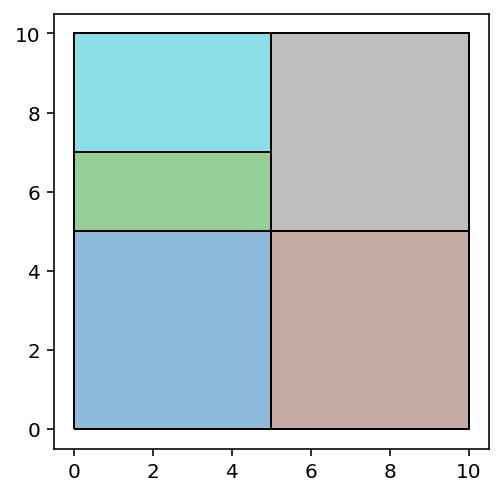

In [6]:
res_union = gpd.overlay(df1, df2, how='union')
ax = res_union.plot(alpha=0.5, cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

## Area Table

In [7]:
area_tables(df1, df2)

(array([[25.,  0., 25.,  0.,  0.],
        [ 0., 10.,  0., 25., 15.]]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [8]:
area_tables(df2, df1)

(array([[25.,  0., 10.,  0.,  0.],
        [ 0., 25.,  0., 25.,  0.],
        [ 0.,  0.,  0.,  0., 15.]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [9]:
extensive_vars = ['population', 'income']
intensive_vars = ['pci']
estimates = area_interpolate(df1, df2, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars)

estimates

,population,income,pci,geometry
0,289.999998,22749.999762,82.14286,"POLYGON ((0.00000 0.00000, 5.00000 0.00000, 5...."
1,350.000000,28750.000000,87.50000,"POLYGON ((5.00000 0.00000, 5.00000 10.00000, 1..."
2,59.999996,5999.999642,100.00000,"POLYGON ((0.00000 7.00000, 0.00000 10.00000, 5..."


In [10]:
extensive_vars = ['population', 'income']
intensive_vars = ['pci']
estimates = area_interpolate(df2, df1, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars)
estimates

,population,income,pci,geometry
0,407.142866,30785.714924,77.500000,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."
1,392.857149,34714.286193,84.999997,"POLYGON ((0.00000 5.00000, 0.00000 10.00000, 1..."


## Non-exhuastive case

Here the first set of polygons have an envelope that does not coincide with that of the second dataframe.


<AxesSubplot:>

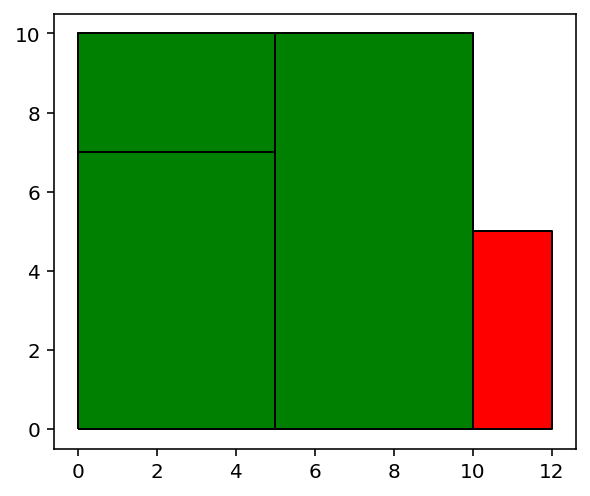

In [11]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (12,0), (12,5), (0,5)]),
                      Polygon([(0,5), (0,10),  (10,10), (10,5)])])

polys2 = gpd.GeoSeries([Polygon([(0,0), (5,0), (5,7), (0,7)]),
                      Polygon([(5,0), (5,10),  (10,10), (10,0)]),
                       Polygon([(0,7), (0,10), (5,10), (5,7)  ])
                       ])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df1['population'] = [ 500,  200]
df1['pci'] = [75, 100]
df1['income'] = df1['population'] * df1['pci']

df2['population'] = [ 500,  100, 200]
df2['pci'] = [75, 80, 100]
df2['income'] = df2['population'] * df2['pci']

ax = df1.plot(color='red', edgecolor='k')
df2.plot(ax=ax, color='green',edgecolor='k')


In [12]:
extensive_vars = ['population']
intensive_vars = ['pci']
estimates = area_interpolate(df1, df2, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars)
estimates

,population,pci,geometry
0,289.999998,82.14286,"POLYGON ((0.00000 0.00000, 5.00000 0.00000, 5...."
1,350.000000,87.50000,"POLYGON ((5.00000 0.00000, 5.00000 10.00000, 1..."
2,59.999996,100.00000,"POLYGON ((0.00000 7.00000, 0.00000 10.00000, 5..."


In [13]:
estimates.sum()

population    699.999994
pci           269.642860
dtype: float64

In [14]:
extensive_vars = ['population']
intensive_vars = ['pci']
estimates = area_interpolate(df1, df2, extensive_variables = extensive_vars,
                            intensive_variables = intensive_vars,
                            allocate_total=False)
estimates

,population,pci,geometry
0,248.333333,82.14286,"POLYGON ((0.00000 0.00000, 5.00000 0.00000, 5...."
1,308.333333,87.50000,"POLYGON ((5.00000 0.00000, 5.00000 10.00000, 1..."
2,60.000000,100.00000,"POLYGON ((0.00000 7.00000, 0.00000 10.00000, 5..."


In [15]:
estimates.sum()

population    616.666667
pci           269.642860
dtype: float64

When setting `allocate_total=False` the total population of a source zone is not completely allocated, but rather the proportion of total population is set to the area of intersection over the area of the source zone.

This will have no effect when the source df is df2 and the target df is df 1:

In [16]:
extensive_vars = ['population']
estimates = area_interpolate(df2, df1, extensive_variables = extensive_vars)
estimates

,population,geometry
0,407.142866,"POLYGON ((0.00000 0.00000, 12.00000 0.00000, 1..."
1,392.857149,"POLYGON ((0.00000 5.00000, 0.00000 10.00000, 1..."


In [17]:
extensive_vars = ['population']
estimates = area_interpolate(df2, df1, extensive_variables = extensive_vars, allocate_total=False)
estimates

,population,geometry
0,407.142857,"POLYGON ((0.00000 0.00000, 12.00000 0.00000, 1..."
1,392.857143,"POLYGON ((0.00000 5.00000, 0.00000 10.00000, 1..."
